# Worldwide COVID-19 Data Analysis

This solution notebook serves as a reference for completing project tasks. Learners are encouraged to explore various approaches and derive insights from the generated analyses and visualizations. If time permits, additional analyses from the dataset can be included in the mentoring sessions.

## Activity 1: Data Loading and Exploration

In [1]:
# Necessary imports
import matplotlib.pyplot as plt
import pandas
import seaborn
import numpy
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Optional imports
import sys
import io
import requests

# Shows all outputs and extends output width
pandas.set_option('display.max_rows', None)
pandas.set_option('display.width', 200)

#io and requests allow direct reference to csv via a link
url = "https://educlaas.omnilearnlms.sambaash.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EDUCLaaS+PYD+PDDS-PYD-0424-24Jul2024+type@asset+block/owid-covid-data.csv"
serverRequest = requests.get(url).content

#csvFile already counts as a DataFrame on read
csvFile = pandas.read_csv(io.StringIO(serverRequest.decode('utf-8')))

1.	Load the COVID-19 dataset using pandas from the provided dataset.

In [ ]:
# length check
print(len(csvFile.index))
print(csvFile.columns)
print(csvFile.dtypes)

358838
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred'

In [ ]:
# prompt: print all unique values under the 'location' column with 'Unknown' as the continent

print(csvFile[csvFile['continent'] == 'Unknown']['location'].unique())


[]


2.	Display the first 5 and last 5 rows of the DataFrame.

In [ ]:
print(csvFile.head())
print(csvFile.tail())

  iso_code continent     location        date  total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0                 NaN           NaN         0.0                  NaN  ...           NaN                  37.746   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0                 NaN           NaN         0.0                  NaN  ...           NaN                  37.746   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0                 NaN           NaN         0.0                  NaN  ...           NaN                  37.746   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0                 NaN           NaN         0.0                  NaN  ...           NaN                  37.746   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0                

Check for missing values in the dataset and decide on a strategy to handle them.

In [ ]:
# Check for missing values
missing_values = csvFile.isnull().sum()
print(missing_values)

iso_code                                           0
continent                                      17108
location                                           0
date                                               0
total_cases                                    38210
new_cases                                       9806
new_cases_smoothed                             11065
total_deaths                                   59752
new_deaths                                      9749
new_deaths_smoothed                            10979
total_cases_per_million                        38210
new_cases_per_million                           9806
new_cases_smoothed_per_million                 11065
total_deaths_per_million                       59752
new_deaths_per_million                          9749
new_deaths_smoothed_per_million                10979
reproduction_rate                             174021
icu_patients                                  320985
icu_patients_per_million                      

Convert the 'date' column to the datetime data type.

In [2]:
#  Data Types
csvFile['date'] = pandas.to_datetime(csvFile['date'])
print(csvFile.date.unique())

<DatetimeArray>
['2020-01-03 00:00:00', '2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00', '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00', '2020-01-10 00:00:00',
 '2020-01-11 00:00:00', '2020-01-12 00:00:00',
 ...
 '2020-01-01 00:00:00', '2020-01-02 00:00:00', '2023-11-23 00:00:00', '2023-11-24 00:00:00', '2023-11-25 00:00:00', '2023-11-26 00:00:00', '2023-11-27 00:00:00', '2023-11-28 00:00:00',
 '2023-11-29 00:00:00', '2023-11-30 00:00:00']
Length: 1430, dtype: datetime64[ns]


4.	Remove the columns with more than 90% of missing values.

In [3]:
threshold = 0.1
csvFile = csvFile.dropna(thresh=len(csvFile) * threshold, axis=1)
print(csvFile.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'new_people_vaccinate

Activity 2: Data Cleaning and Feature Engineering

1.	Impute missing values in the dataset columns

In [4]:
# Check for missing values
missing_values = csvFile.isnull().sum()
print(missing_values)

iso_code                                           0
continent                                      17108
location                                           0
date                                               0
total_cases                                    38210
new_cases                                       9806
new_cases_smoothed                             11065
total_deaths                                   59752
new_deaths                                      9749
new_deaths_smoothed                            10979
total_cases_per_million                        38210
new_cases_per_million                           9806
new_cases_smoothed_per_million                 11065
total_deaths_per_million                       59752
new_deaths_per_million                          9749
new_deaths_smoothed_per_million                10979
reproduction_rate                             174021
icu_patients                                  320985
icu_patients_per_million                      

In [5]:
# Select numerical columns and fill NaN with the column mean
numeric_columns = csvFile.select_dtypes(include=['number']).columns
for column in numeric_columns:
    mean_value = csvFile[column].mean()
    csvFile[column].fillna(mean_value, inplace=True)

# Select object columns and fill NaN with "Unknown"
object_columns = csvFile.select_dtypes(include=['object']).columns
for column in object_columns:
    csvFile[column].fillna('Unknown', inplace=True)

print(csvFile.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million               

In [ ]:
#Check for unique continent
unique_continents = csvFile['continent'].unique()
print(unique_continents)

#Check for continent counts -> no unique value is used once
continent_counts = csvFile['continent'].value_counts()
print(continent_counts)

['Asia' 'Unknown' 'Europe' 'Africa' 'Oceania' 'North America'
 'South America']
continent
Africa           80941
Europe           77680
Asia             70901
North America    58242
Oceania          34080
South America    19886
Unknown          17108
Name: count, dtype: int64


2.	Remove duplicate rows from the DataFrame.

In [6]:
#. Remove Duplicates
# Check the number of rows before removing duplicates
num_rows_before = csvFile.shape[0]

# Remove duplicates
csvFile = csvFile.drop_duplicates()

# Check the number of rows after removing duplicates
num_rows_after = csvFile.shape[0]

# Print the number of duplicates removed
print("Number of duplicates removed:", num_rows_before - num_rows_after)

Number of duplicates removed: 0


In [ ]:
# Run these to avoid graphing errors for these columns later on - OBSOLETE SINCE numeric_gaps ARE REPLACED WITH MEAN VALUES
#csvFile['new_cases'] = pandas.to_numeric(csvFile['new_cases'], errors='coerce')
#csvFile['new_deaths'] = pandas.to_numeric(csvFile['new_deaths'], errors='coerce')
#csvFile['total_cases'] = pandas.to_numeric(csvFile['total_cases'], errors='coerce')
#csvFile['total_deaths'] = pandas.to_numeric(csvFile['total_deaths'], errors='coerce')


3.	Create new features if needed (e.g., extract year and month from the 'date' column).

In [ ]:
 #  Feature Engineering (example: extracting year and month from the date)
# since iso_code and countries have the same number of unique values (255 to 255), create a key:value
# create a list of unique values for both country and iso_code
unique_iso_codes = csvFile['iso_code'].unique()
unique_locations = csvFile['location'].unique()

# init a dictionary
iso_code_to_location = {}

# Iterate over the unique ISO codes and locations
for i in range(len(unique_iso_codes)):
  iso_code_to_location[unique_iso_codes[i]] = unique_locations[i]

def corr_country_or_ISO(text):
  #check if text is ISO or no
  isUpper = text.isupper()
  if (isUpper):
    print(iso_code_to_location.get(text))
  else:
    if(text in iso_code_to_location.values()):
      print(list(iso_code_to_location.keys())[list(iso_code_to_location.values()).index(text)])
    else: print('None')

corr_country_or_ISO('ARG')
corr_country_or_ISO('ASU')
corr_country_or_ISO('Argentina')
corr_country_or_ISO('Kamchatka')

Argentina
None
ARG
None


4.	Explore unique countries in the dataset and count the total number of countries.

In [ ]:
#Check for unique continent
unique_continents = csvFile['location'].unique()
print(unique_continents)

#Check for how many unique countries there are
num_unique_countries = len(unique_continents)
print("Number of unique countries:", num_unique_countries)

#Check for continent counts -> no unique value is used once
continent_counts = csvFile['location'].value_counts()
print(continent_counts)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

## Activity 3: Worldwide COVID-19 Overview

1.	Visualize the total COVID-19 cases and total deaths by continent using bar plots.

Total cases by continent:
 continent
Africa           1.326781e+07
Asia             3.402149e+08
Europe           2.998803e+08
North America    1.265619e+08
Oceania          1.464895e+07
South America    6.897222e+07
Name: new_cases, dtype: float64

Total deaths by continent:
 continent
Africa           2.595431e+05
Asia             1.984104e+06
Europe           2.525456e+06
North America    1.624614e+06
Oceania          3.151455e+04
South America    1.360691e+06
Name: new_deaths, dtype: float64


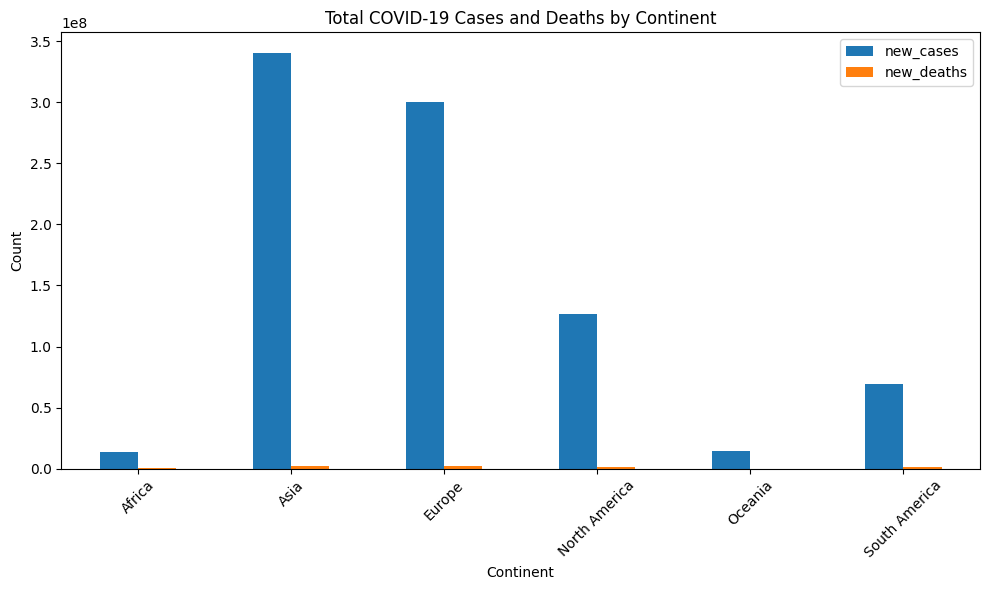

In [7]:
csvFile_3_1 = csvFile[csvFile['continent'] != 'Unknown']

#bar plots by continent - Total cases and total deaths
csvFile_3_1['new_cases'] = pandas.to_numeric(csvFile['new_cases'], errors='coerce')
csvFile_3_1['new_deaths'] = pandas.to_numeric(csvFile['new_deaths'], errors='coerce')

# sum(new_cases) and sum(new_deaths) for each continent
continent_cases = csvFile_3_1.groupby('continent')['new_cases'].sum()
continent_deaths = csvFile_3_1.groupby('continent')['new_deaths'].sum()

# print the results
print("Total cases by continent:\n", continent_cases)
print("\nTotal deaths by continent:\n", continent_deaths)

# group the data by continent and calculate the sum of 'new_cases' and 'new_deaths'
continent_stats = csvFile_3_1.groupby('continent')[['new_cases', 'new_deaths']].sum()

# create a bar plot
continent_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Total COVID-19 Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.	Explore the monthly trend of new COVID-19 cases using a line plot.

year  month
2020  1        2.832041e+05
      2        9.279079e+05
      3        4.389639e+06
      4        1.105833e+07
      5        1.351039e+07
Name: new_cases, dtype: float64
year  month
2023  7        7.600622e+06
      8        8.043518e+06
      9        4.315023e+06
      10       4.026781e+06
      11       3.910015e+06
Name: new_cases, dtype: float64


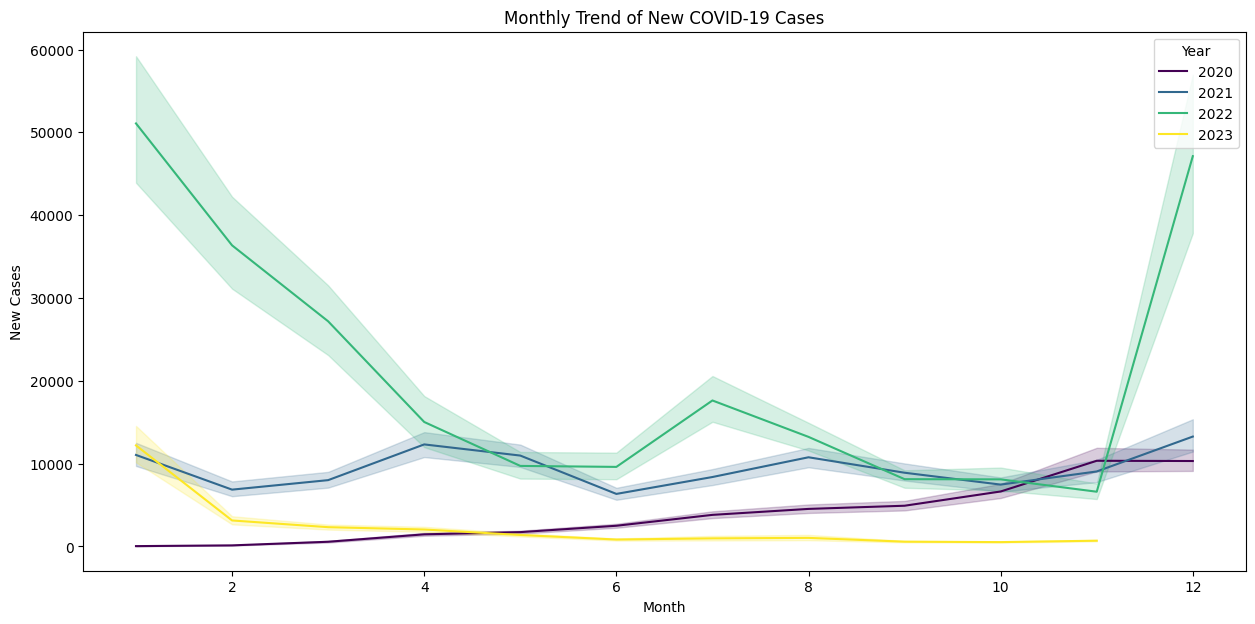

In [ ]:
# 1 - convert a date column to return only the month value
csvFile['month'] = csvFile['date'].dt.month
csvFile['year'] = csvFile['date'].dt.year

# 2 - sum up values useing groupby('month').sum()
csvFile['new_cases'] = pandas.to_numeric(csvFile['new_cases'], errors='coerce')
# WORKS 1 case_Per_Month = csvFile.groupby('date_time')['new_cases'].sum()
case_Per_Month = csvFile.groupby(['year', 'month'])['new_cases'].sum()

print(case_Per_Month.head())
print(case_Per_Month.tail())

# 3 - create a line plot
plt.figure(figsize=(15, 7))
# WORKS 1 seaborn.lineplot(x=case_Per_Month.index, y=case_Per_Month.values)
seaborn.lineplot(x='month', y='new_cases', data=csvFile, hue='year', palette='viridis')
plt.title('Monthly Trend of New COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend(title='Year')
plt.show()

3.	Investigate the correlation between total cases and total deaths using a heatmap.

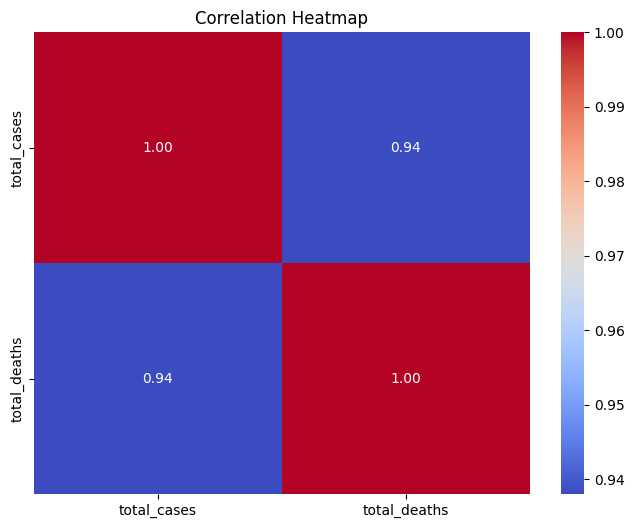

In [ ]:
csvFile['total_cases'] = pandas.to_numeric(csvFile['total_cases'], errors='coerce')
csvFile['total_deaths'] = pandas.to_numeric(csvFile['total_deaths'], errors='coerce')

# Select relevant columns for correlation analysis
correlation_data = csvFile[['total_cases', 'total_deaths']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

4.	Analyze how total cases have evolved over time for a specific location (e.g., India).

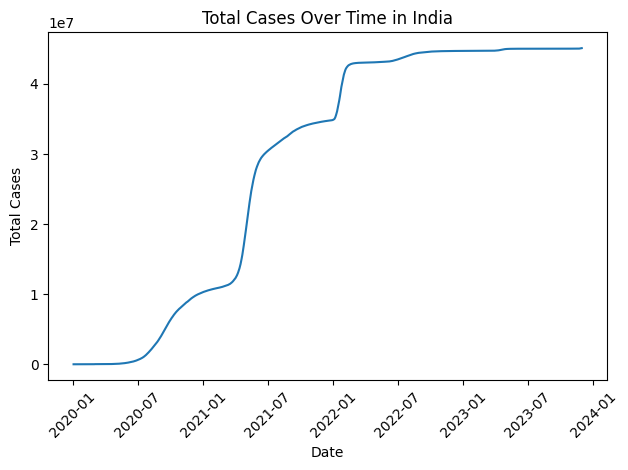

In [8]:
# Filter data for a specific location (e.g., India)
location_India = csvFile[csvFile['location'] == 'India']

# Calculate the cumulative sum of new cases
location_India['new_cases'] = pandas.to_numeric(location_India['new_cases'], errors='coerce')
location_India['cumulative_cases'] = location_India['new_cases'].cumsum()

# Plot the time series of total cases
seaborn.lineplot(x='date', y='cumulative_cases', data=location_India)
plt.title('Total Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Activity 4: Regional Analysis

1.	Create a grouped bar chart to visualize new cases by continent and month.

['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


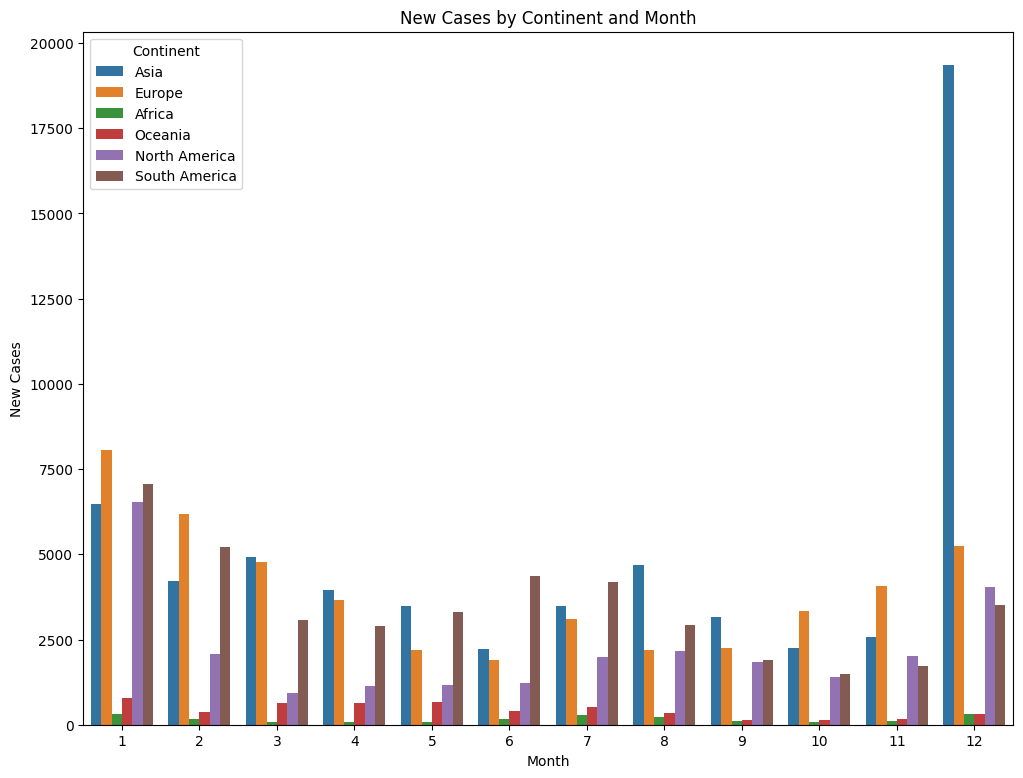

In [ ]:
# Filter out rows with "Unknown" continent
csvFile_4_1 = csvFile[csvFile['continent'] != 'Unknown']
unique_continents = csvFile_4_1['continent'].unique()
print(unique_continents)

# Create a grouped bar chart using Seaborn
csvFile_4_1['month'] = csvFile_4_1['date'].dt.month
csvFile_4_1['year'] = csvFile_4_1['date'].dt.year

plt.figure(figsize=(12, 9))
seaborn.barplot(x='month', y='new_cases', hue='continent', data=csvFile_4_1, ci=None, dodge=True)
plt.title('New Cases by Continent and Month')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend(title='Continent')
plt.show()

2.	Visualize the distribution of total COVID-19 cases by year using a box plot.

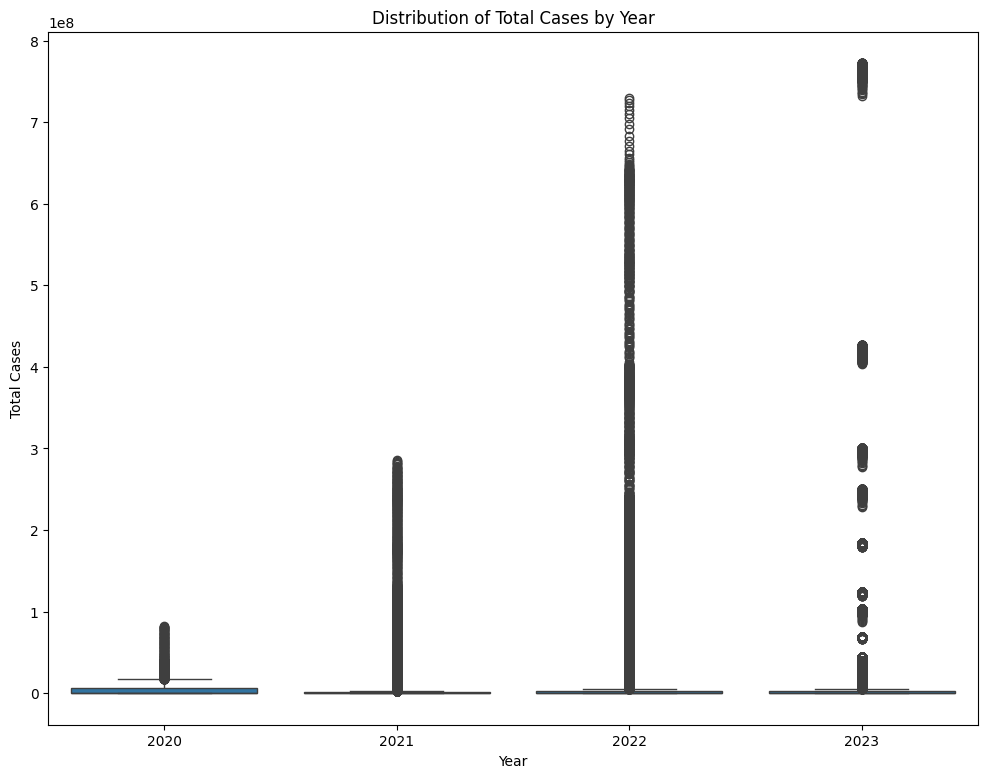

In [ ]:
# Create a box plot using Seaborn
plt.figure(figsize=(12, 9))
seaborn.boxplot(x='year', y='total_cases', data=csvFile)
plt.title('Distribution of Total Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

3.	Compare total deaths across different continents using a bar plot.

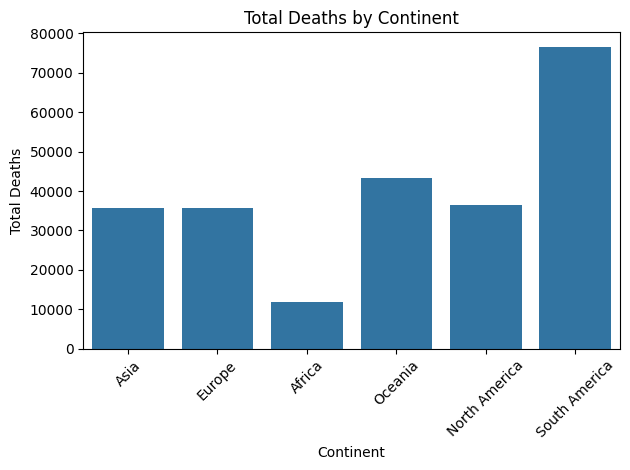

In [9]:
# Filter out rows with "Unknown" continent
csvFile_4_3 = csvFile[csvFile['continent'] != 'Unknown']

# Create a grouped bar chart using Seaborn
csvFile_4_3['month'] = csvFile_4_3['date'].dt.month
csvFile_4_3['year'] = csvFile_4_3['date'].dt.year

# Create a bar plot using Seaborn
seaborn.barplot(x='continent', y='total_deaths', data=csvFile_4_3, ci=None)
plt.title('Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.	Analyze the total cases on a month-by-month basis using a bar plot.

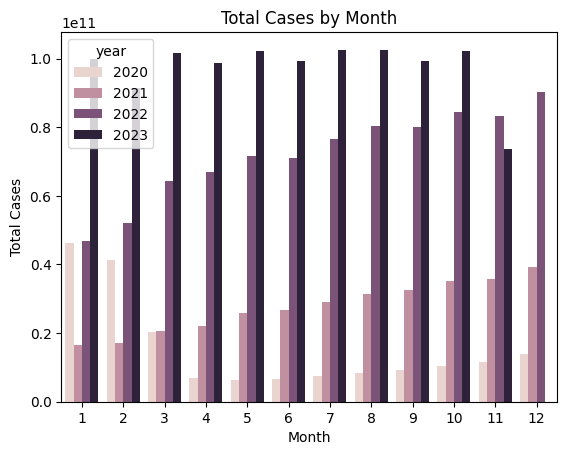

In [ ]:
# Group by month and calculate the sum of total cases
monthly_total_cases = csvFile.groupby(['year','month'])['total_cases'].sum().reset_index()

# Create a bar plot using Seaborn
seaborn.barplot(x='month', y='total_cases', data=monthly_total_cases, ci=None,hue='year')
plt.title('Total Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()

## Activity 5: Time Series Analysis

1.	Explore the daily trend of new cases and new deaths globally using line plots.

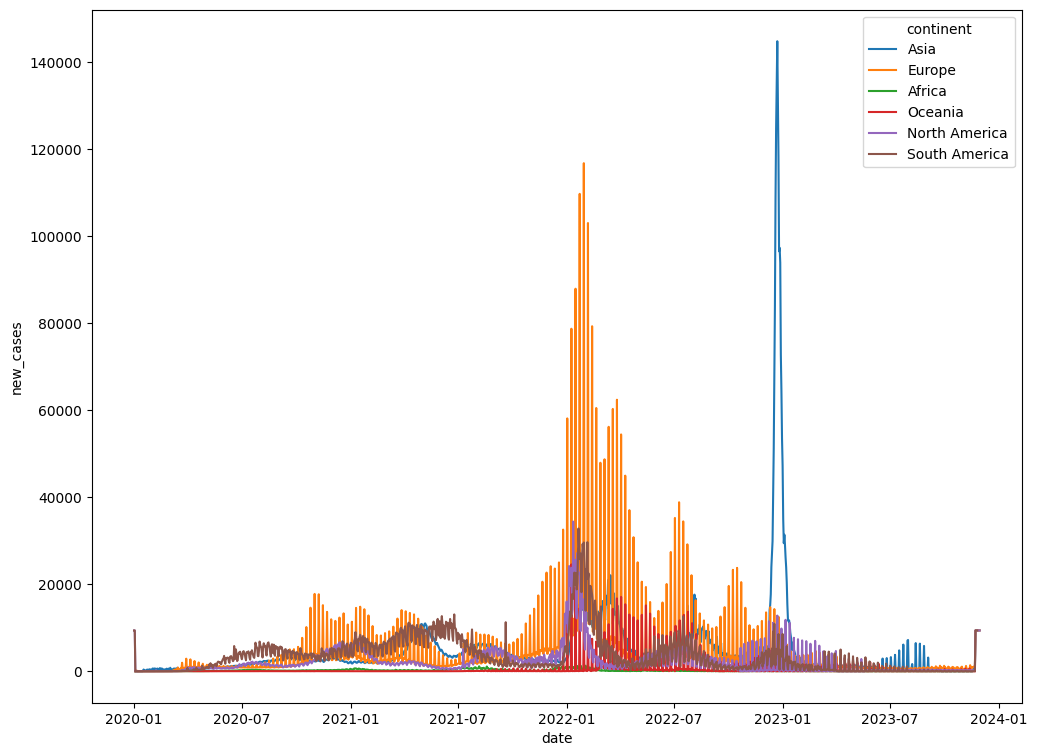

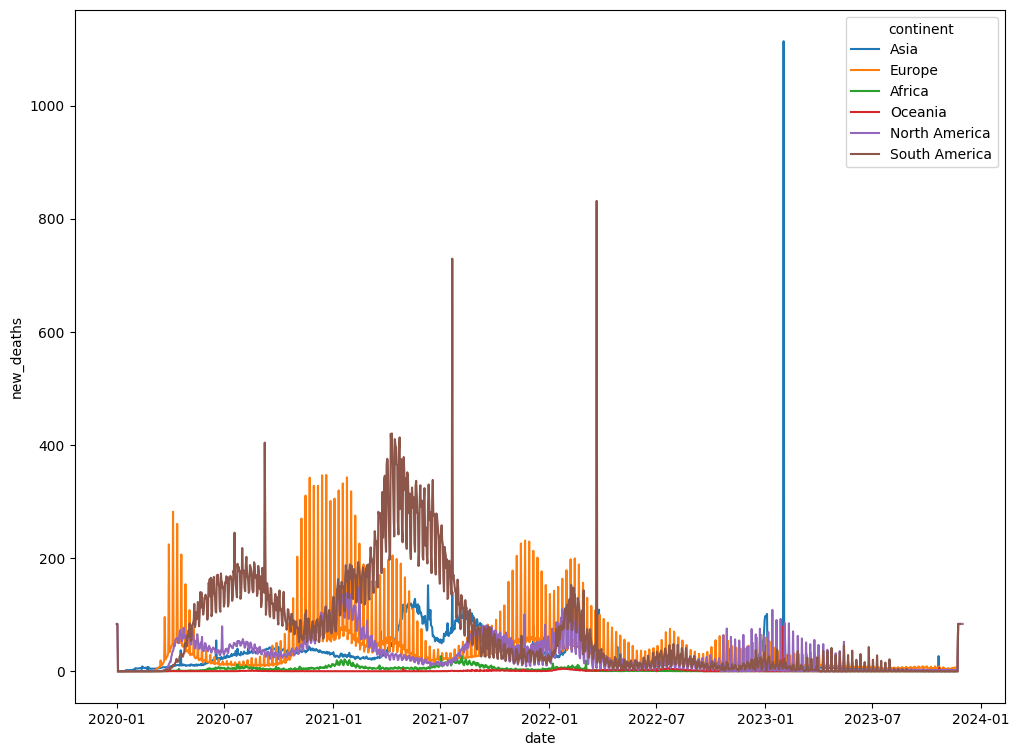

In [ ]:
# Filter out rows with "Unknown" continent
csvFile_5_1 = csvFile[csvFile['continent'] != 'Unknown']

# Create line plots for new cases and new deaths
plt.figure(figsize=(12, 9))
seaborn.lineplot(x='date', y='new_cases', hue='continent', data=csvFile_5_1, ci = None)
plt.show()

plt.figure(figsize=(12, 9))
seaborn.lineplot(x='date', y='new_deaths', hue='continent', data=csvFile_5_1, ci = None)
plt.show()

2.	Calculate and visualize the daily average new cases and deaths globally.

        date    new_cases  new_deaths
0 2020-01-01  9375.505633   83.515536
1 2020-01-02  9375.505633   83.515536
2 2020-01-03     0.000000    0.000000
3 2020-01-04     0.012821    0.000000
4 2020-01-05    40.066263    0.012821


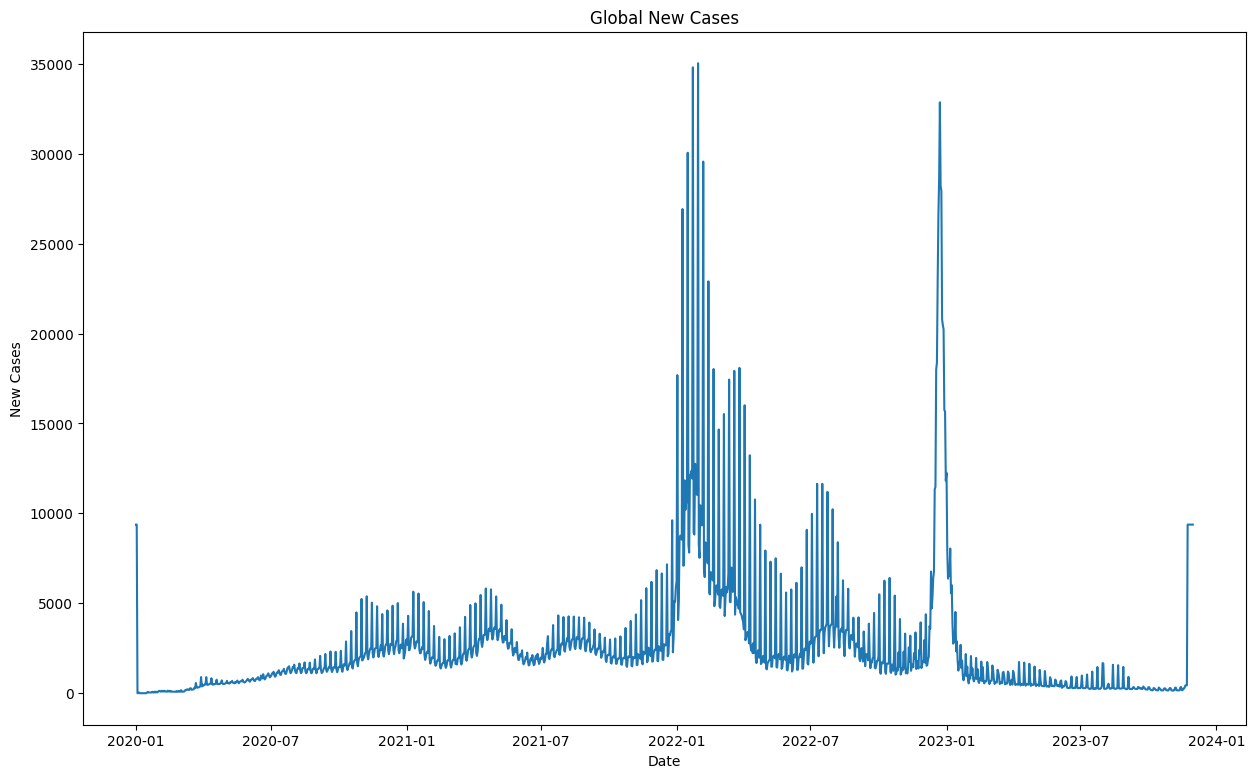

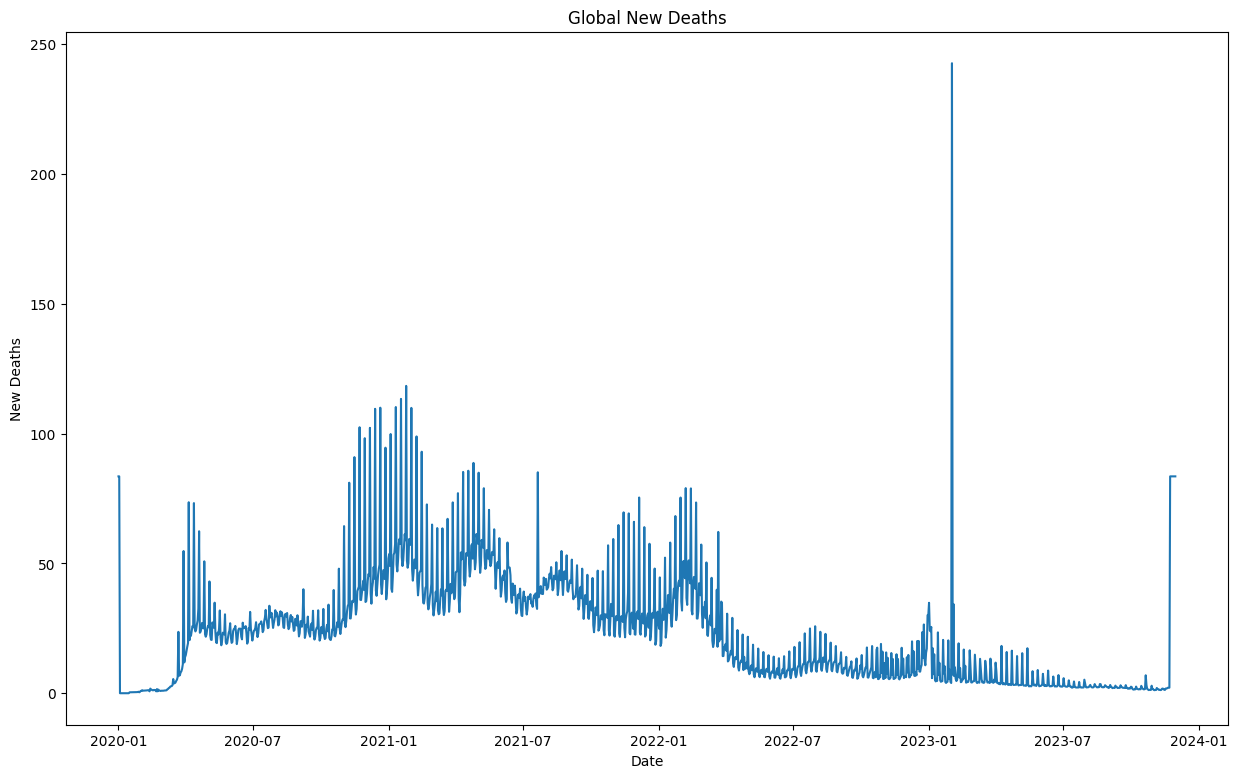

In [16]:
# Filter out rows with "Unknown" continent
csvFile_5_2 = csvFile[csvFile['continent'] != 'Unknown']

# Create a grouped bar chart using Seaborn
daily_average = csvFile_5_2.groupby('date').agg({'new_cases': 'mean', 'new_deaths': 'mean'}).reset_index()
print(daily_average.head())
# Create a bar plot using Seaborn
plt.figure(figsize=(15, 9))
seaborn.lineplot(x='date', y='new_cases', data=daily_average, ci=None)
plt.title('Global New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.figure(figsize=(15, 9))
seaborn.lineplot(x='date', y='new_deaths', data=daily_average, ci=None)
plt.title('Global New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()

3.	Explore the trend of vaccination coverage over time globally.

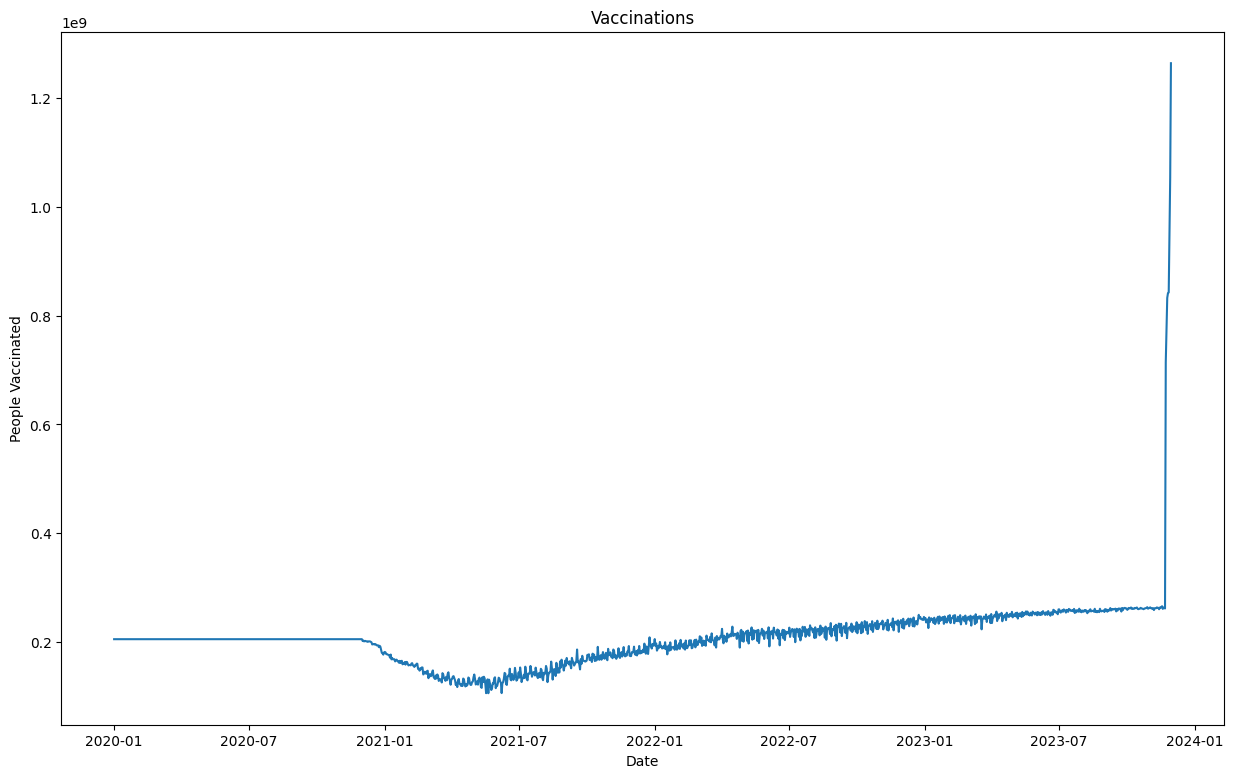

In [ ]:
csvFile['people_vaccinated'] = pandas.to_numeric(csvFile['people_vaccinated'], errors='coerce')

# Create line plot for vaccination coverage over time globally
plt.figure(figsize=(15, 9))
seaborn.lineplot(x='date', y='people_vaccinated', data=csvFile, ci=None)
plt.title('Vaccinations')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.show()

4.	Analyze the total tests and positive rate over time globally.

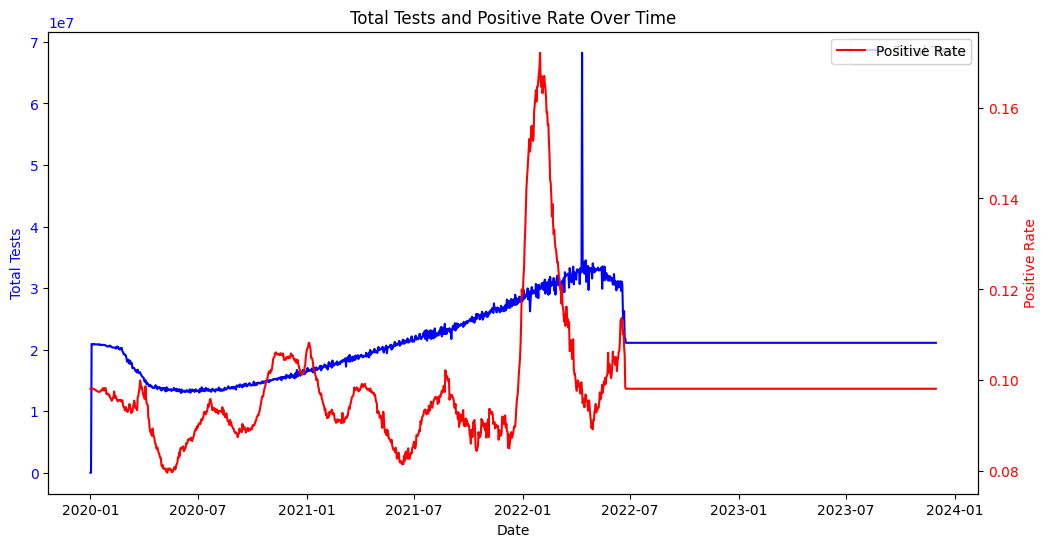

In [22]:
# Create a figure and axis with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for total tests
seaborn.lineplot(x='date', y='total_tests', data=csvFile, color='blue', ax=ax1, ci=None, label='Total Tests')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for positive rate
ax2 = ax1.twinx()
seaborn.lineplot(x='date', y='positive_rate', data=csvFile, color='red', ax=ax2, ci=None, label='Positive Rate')
ax2.set_ylabel('Positive Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title for the plot
plt.title('Total Tests and Positive Rate Over Time')
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Activity 6: In-Depth Country Analysis

1.	Visualize the total COVID-19 cases and deaths over time for a specific country (e.g., India).

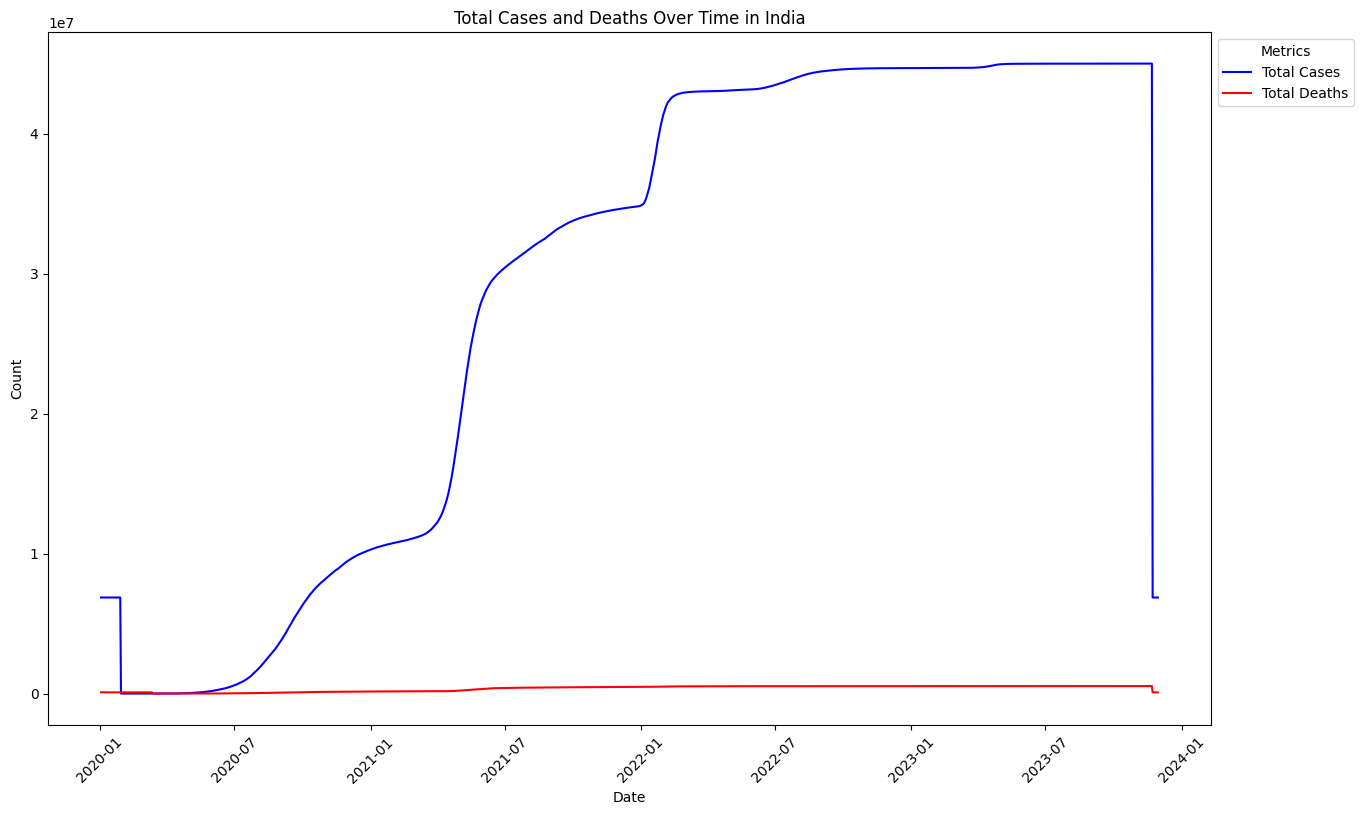

In [ ]:
# Filter data for a specific country (e.g., India)
country_data = csvFile[csvFile['location'] == 'India']

# Create line plots for total cases and total deaths over time
plt.figure(figsize=(15, 9))

# Line plot for total cases
seaborn.lineplot(x='date', y='total_cases', data=country_data, color='blue', label='Total Cases')

# Line plot for total deaths
seaborn.lineplot(x='date', y='total_deaths', data=country_data, color='red', label='Total Deaths')

plt.title('Total Cases and Deaths Over Time in India')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

2.	Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user selected values.

Enter the country name (Select from:
Afghanistan, Africa, Albania, Algeria, American Samoa,
Andorra, Angola, Anguilla, Antigua and Barbuda,
Argentina, Armenia, Aruba, Asia, Australia, Austria,
Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados,
Belarus, Belgium, Belize, Benin, Bermuda, Bhutan,
Bolivia, Bonaire Sint Eustatius and Saba,
Bosnia and Herzegovina, Botswana, Brazil,
British Virgin Islands, Brunei, Bulgaria, Burkina Faso,
Burundi, Cambodia, Cameroon, Canada, Cape Verde,
Cayman Islands, Central African Republic, Chad, Chile,
China, Colombia, Comoros, Congo, Cook Islands,
Costa Rica, Cote d'Ivoire, Croatia, Cuba, Curacao,
Cyprus, Czechia, Democratic Republic of Congo, Denmark,
Djibouti, Dominica, Dominican Republic, Ecuador, Egypt,
El Salvador, England, Equatorial Guinea, Eritrea,
Estonia, Eswatini, Ethiopia, Europe, European Union,
Faeroe Islands, Falkland Islands, Fiji, Finland, France,
French Guiana, French Polynesia, Gabon, Gambia, Georgia,
Germany, Ghana, Gibraltar, Greece,

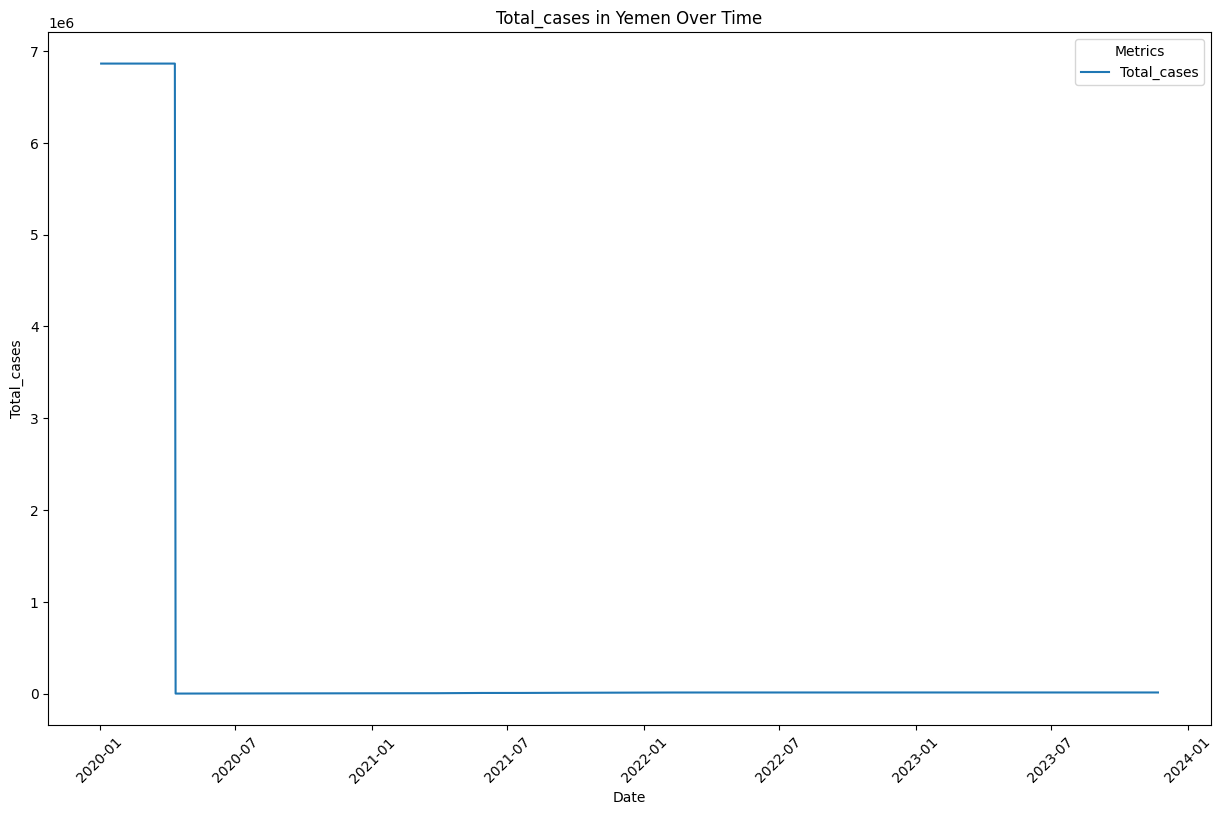

In [ ]:
selected_country = input(
    "Enter the country name (Select from:\n"
    "Afghanistan, Africa, Albania, Algeria, American Samoa,\n"
    "Andorra, Angola, Anguilla, Antigua and Barbuda,\n"
    "Argentina, Armenia, Aruba, Asia, Australia, Austria,\n"
    "Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados,\n"
    "Belarus, Belgium, Belize, Benin, Bermuda, Bhutan,\n"
    "Bolivia, Bonaire Sint Eustatius and Saba,\n"
    "Bosnia and Herzegovina, Botswana, Brazil,\n"
    "British Virgin Islands, Brunei, Bulgaria, Burkina Faso,\n"
    "Burundi, Cambodia, Cameroon, Canada, Cape Verde,\n"
    "Cayman Islands, Central African Republic, Chad, Chile,\n"
    "China, Colombia, Comoros, Congo, Cook Islands,\n"
    "Costa Rica, Cote d'Ivoire, Croatia, Cuba, Curacao,\n"
    "Cyprus, Czechia, Democratic Republic of Congo, Denmark,\n"
    "Djibouti, Dominica, Dominican Republic, Ecuador, Egypt,\n"
    "El Salvador, England, Equatorial Guinea, Eritrea,\n"
    "Estonia, Eswatini, Ethiopia, Europe, European Union,\n"
    "Faeroe Islands, Falkland Islands, Fiji, Finland, France,\n"
    "French Guiana, French Polynesia, Gabon, Gambia, Georgia,\n"
    "Germany, Ghana, Gibraltar, Greece, Greenland, Grenada,\n"
    "Guadeloupe, Guam, Guatemala, Guernsey, Guinea,\n"
    "Guinea-Bissau, Guyana, Haiti, High income, Honduras,\n"
    "Hong Kong, Hungary, Iceland, India, Indonesia, Iran,\n"
    "Iraq, Ireland, Isle of Man, Israel, Italy, Jamaica,\n"
    "Japan, Jersey, Jordan, Kazakhstan, Kenya, Kiribati,\n"
    "Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lebanon,\n"
    "Lesotho, Liberia, Libya, Liechtenstein, Lithuania,\n"
    "Low income, Lower middle income, Luxembourg, Macao,\n"
    "Madagascar, Malawi, Malaysia, Maldives, Mali, Malta,\n"
    "Marshall Islands, Martinique, Mauritania, Mauritius,\n"
    "Mayotte, Mexico, Micronesia (country), Moldova, Monaco,\n"
    "Mongolia, Montenegro, Montserrat, Morocco, Mozambique,\n"
    "Myanmar, Namibia, Nauru, Nepal, Netherlands,\n"
    "New Caledonia, New Zealand, Nicaragua, Niger, Nigeria,\n"
    "Niue, North America, North Korea, North Macedonia,\n"
    "Northern Cyprus, Northern Ireland, Northern Mariana Islands,\n"
    "Norway, Oceania, Oman, Pakistan, Palau, Palestine,\n"
    "Panama, Papua New Guinea, Paraguay, Peru, Philippines,\n"
    "Pitcairn, Poland, Portugal, Puerto Rico, Qatar,\n"
    "Reunion, Romania, Russia, Rwanda, Saint Barthelemy,\n"
    "Saint Helena, Saint Kitts and Nevis, Saint Lucia,\n"
    "Saint Martin (French part), Saint Pierre and Miquelon,\n"
    "Saint Vincent and the Grenadines, Samoa, San Marino,\n"
    "Sao Tome and Principe, Saudi Arabia, Scotland, Senegal,\n"
    "Serbia, Seychelles, Sierra Leone, Singapore,\n"
    "Sint Maarten (Dutch part), Slovakia, Slovenia,\n"
    "Solomon Islands, Somalia, South Africa, South America,\n"
    "South Korea, South Sudan, Spain, Sri Lanka, Sudan,\n"
    "Suriname, Sweden, Switzerland, Syria, Taiwan,\n"
    "Tajikistan, Tanzania, Thailand, Timor, Togo, Tokelau,\n"
    "Tonga, Trinidad and Tobago, Tunisia, Turkey,\n"
    "Turkmenistan, Turks and Caicos Islands, Tuvalu, Uganda,\n"
    "Ukraine, United Arab Emirates, United Kingdom,\n"
    "United States, United States Virgin Islands,\n"
    "Upper middle income, Uruguay, Uzbekistan, Vanuatu,\n"
    "Vatican, Venezuela, Vietnam, Wales, Wallis and Futuna,\n"
    "Western Sahara, World, Yemen, Zambia, Zimbabwe): "
)

selected_parameter = input("Select the parameter to analyze (total_cases or total_deaths): ")

# Filter the DataFrame based on user input
selected_data = csvFile[csvFile['location'] == selected_country]

# Check if the selected parameter is valid
if selected_parameter not in ['total_cases', 'total_deaths']:
    print("Invalid parameter. Please select 'total_cases' or 'total_deaths'.")
else:
    # Create a line plot for the selected parameter
    plt.figure(figsize=(15, 9))
    seaborn.lineplot(x='date', y=selected_parameter, data=selected_data, ci=None, label=selected_parameter.capitalize())
    plt.title(f'{selected_parameter.capitalize()} in {selected_country} Over Time')
    plt.xlabel('Date')
    plt.ylabel(selected_parameter.capitalize())
    plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()


3.	Analyze the distribution of total cases across different continents using a box plot.

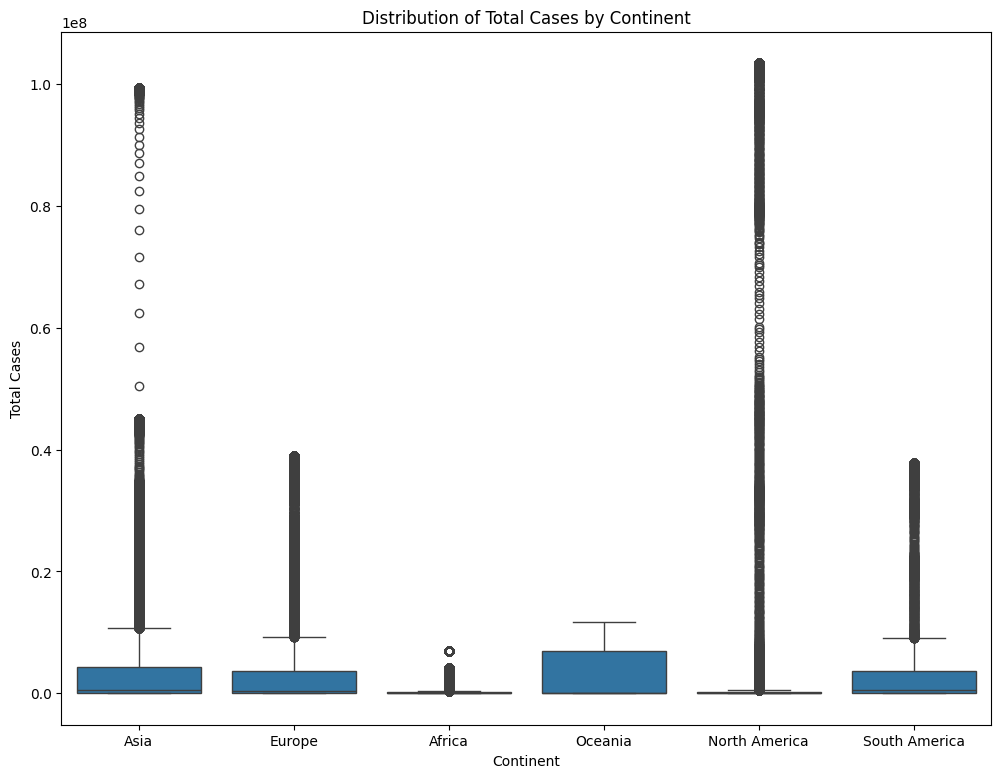

In [ ]:
# Filter out rows with "Unknown" continent
filtered_unknown_continent = csvFile[csvFile['continent'] != 'Unknown']

# Create a box plot for total cases by continent
plt.figure(figsize=(12, 9))
seaborn.boxplot(x='continent', y='total_cases', data=filtered_unknown_continent)
plt.title('Distribution of Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

4.	Visualize the Year wise monthly trend of new COVID-19 cases for user selected country .

Enter the country name: Greece


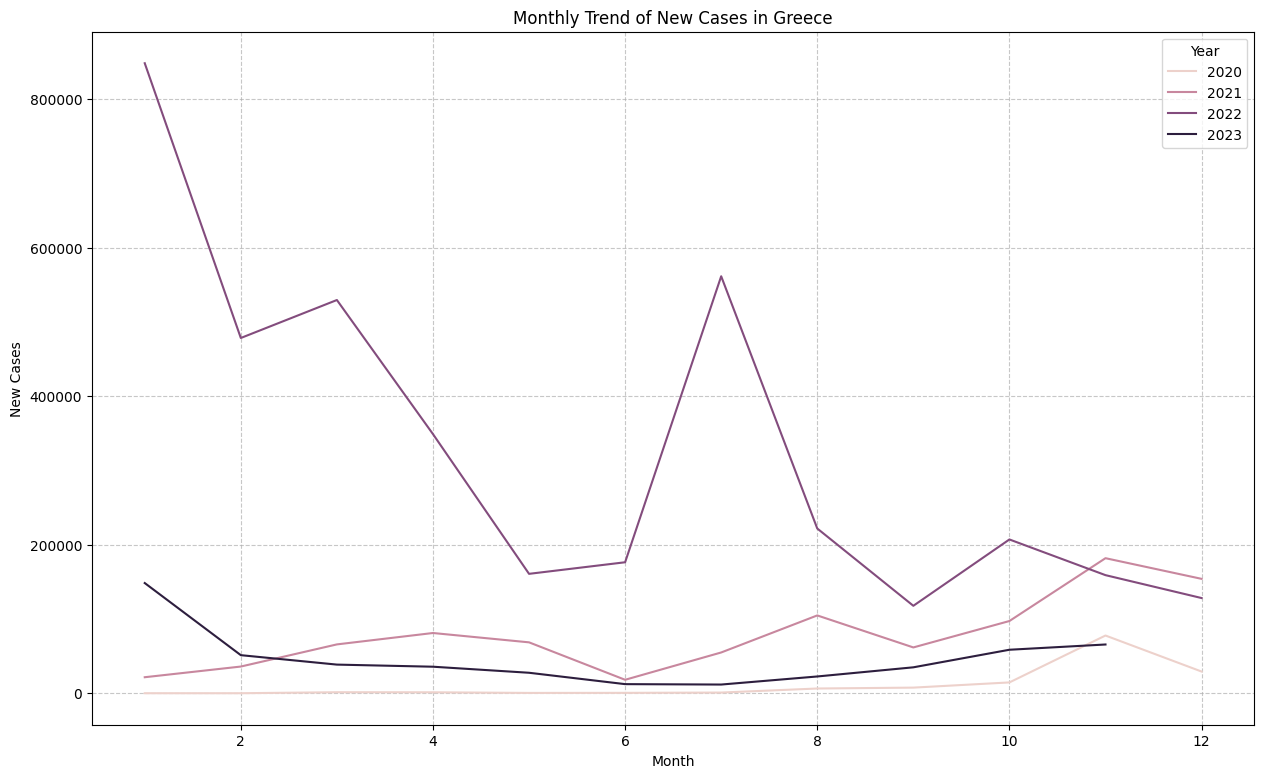

In [ ]:
# Take input from the user for the country
selected_country = input("Enter the country name: ")

# Filter data for the selected country
country_data = csvFile[csvFile['location'] == selected_country]

# Extract month and year from the 'date' column
country_data['month'] = pandas.to_datetime(country_data['date']).dt.month
country_data['year'] = pandas.to_datetime(country_data['date']).dt.year

# Group by month and year, calculate the sum of new cases
monthly_new_cases = country_data.groupby(['year', 'month'])['new_cases'].sum().reset_index()

# Create a line plot for the monthly trend of new cases
plt.figure(figsize=(15, 9))
seaborn.lineplot(x='month', y='new_cases', hue='year', data=monthly_new_cases, ci=None)
plt.title(f'Monthly Trend of New Cases in {selected_country}')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Activity 7: Additional Insights

1.	Visualize the fatality rate (total deaths divided by total cases) over time globally

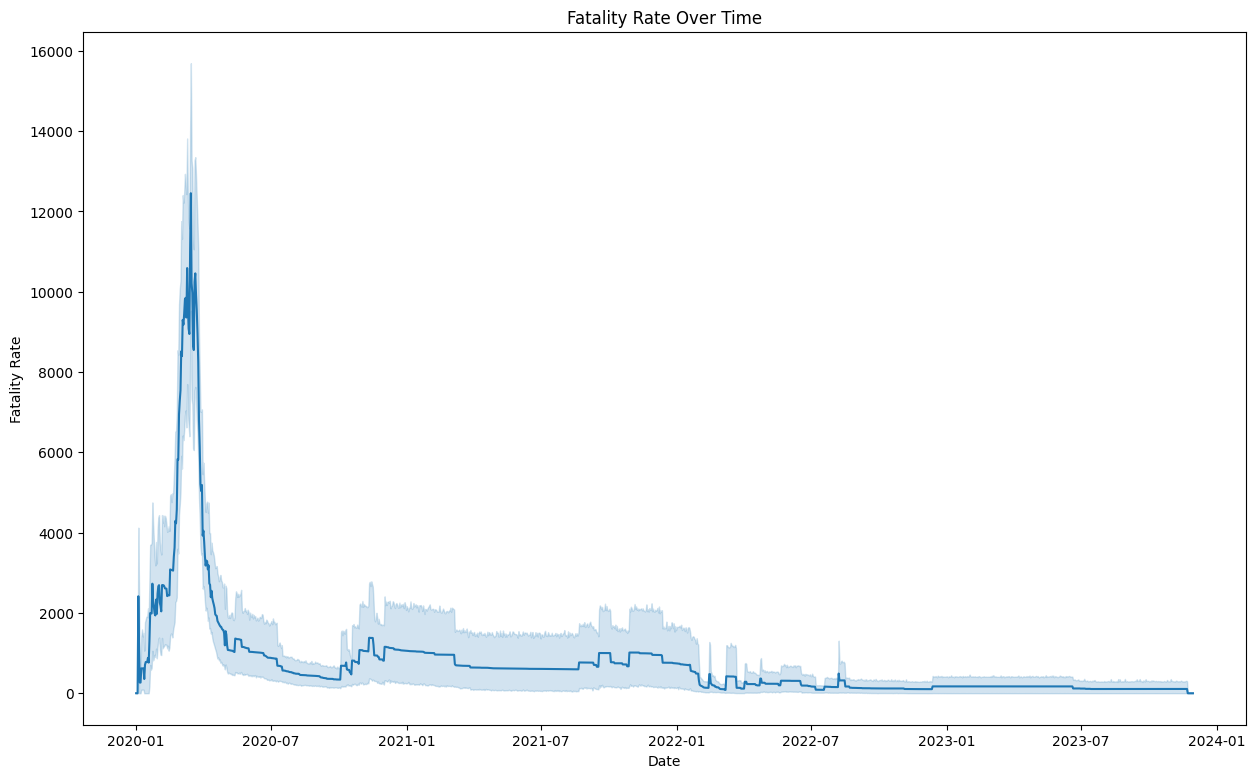

In [ ]:
# Calculate fatality rate
csvFile['fatality_rate'] = csvFile['total_deaths'] / csvFile['total_cases']

# Plot fatality rate over time
plt.figure(figsize=(15, 9))
seaborn.lineplot(x='date', y='fatality_rate', data=csvFile)
plt.title('Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate')
plt.show()

2.	Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness use x axis as logarithmic scale for better visualization.

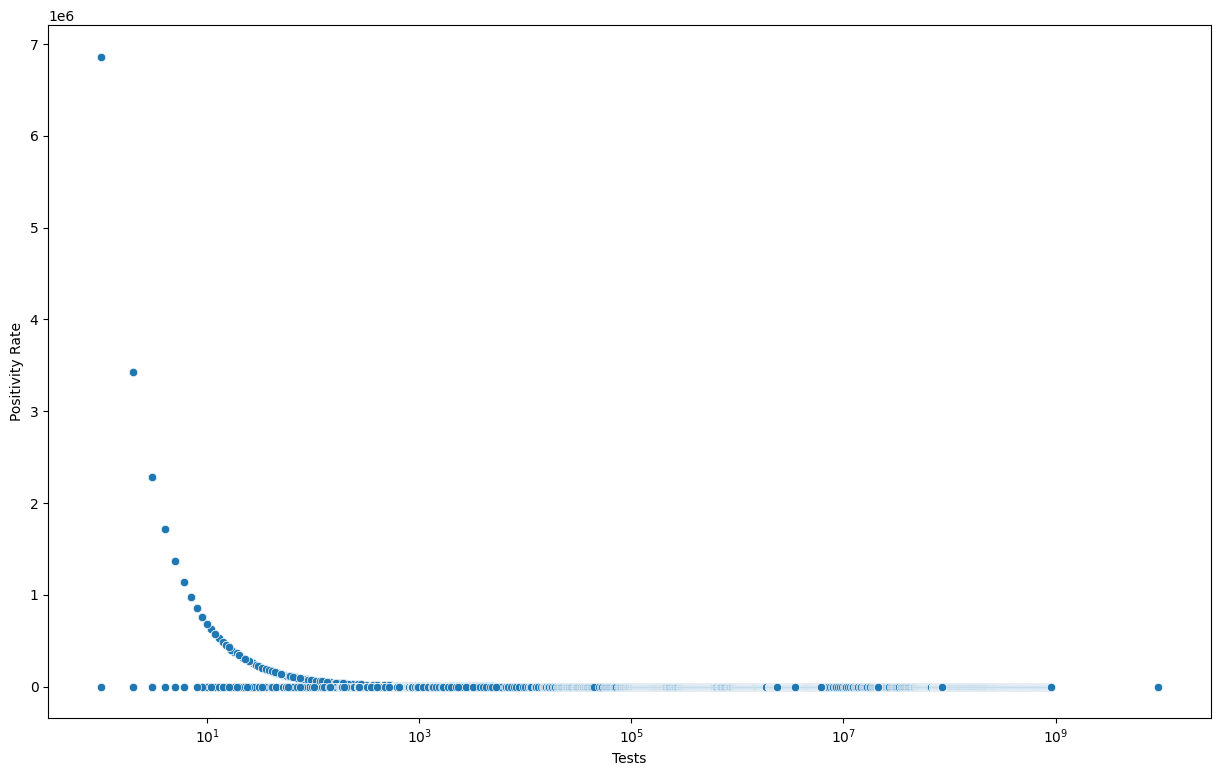

In [ ]:
# Calculate positivity rate
csvFile['positivity_rate'] = csvFile['total_cases'] / csvFile['total_tests']

# Plot fatality rate over time
plt.figure(figsize=(15, 9))
seaborn.scatterplot(x='total_tests', y='positivity_rate', data=csvFile)
plt.xlabel('Tests')
plt.ylabel('Positivity Rate')
plt.xscale('log')
plt.show()

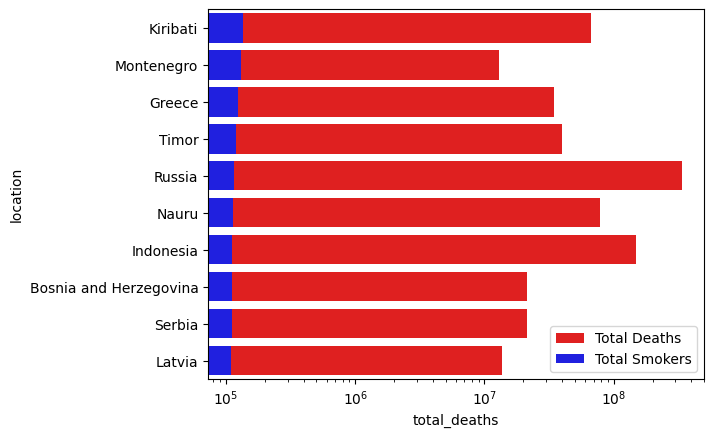

In [ ]:
# Calculate total smokers for each country
csvFile['total_smokers'] = csvFile['male_smokers'] + csvFile['female_smokers']

# Group by country and calculate the total deaths and total smokers
top_smokers_countries = csvFile.groupby('location').agg({'total_deaths':'sum', 'total_smokers':'sum'}).reset_index()

# Sort by total smokers in descending order
top_smokers_countries = top_smokers_countries.sort_values(by='total_smokers', ascending=False).head(10)

# Create a diverging bar chart to visualize total deaths and total smokers for the top countries
seaborn.barplot(x='total_deaths', y='location', data=top_smokers_countries, color='red', label='Total Deaths')
seaborn.barplot(x='total_smokers', y='location', data=top_smokers_countries, color='blue', label='Total Smokers')
plt.xscale('log')
plt.show()

4.	Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate.

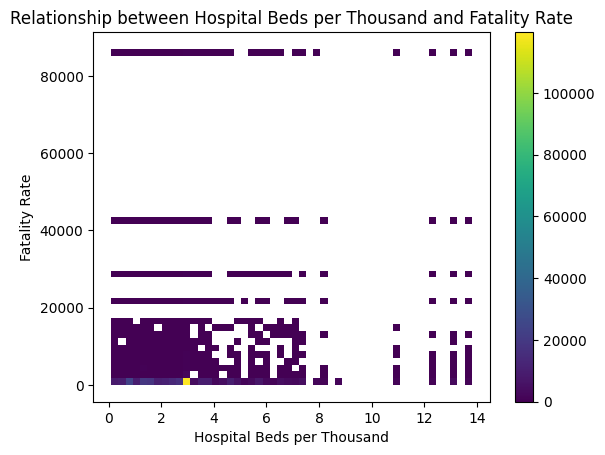

In [ ]:
# Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate
heatmap_data = csvFile[['hospital_beds_per_thousand', 'fatality_rate']].dropna()
seaborn.histplot(x='hospital_beds_per_thousand', y='fatality_rate', data=heatmap_data, bins=(50,50),  cmap='viridis', cbar=True)
plt.title('Relationship between Hospital Beds per Thousand and Fatality Rate')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Fatality Rate')
plt.show()